# Lemmatisierer Evaluierung

In [38]:
import glob
import json
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
FILES = glob.glob("results-*.json")
data = []
for FILE in FILES:
    with open(FILE, "r") as fp:
        data += json.load(fp)

In [4]:
len(data)

47

In [19]:
algos = ["baseline", "germalemma", "simplemma", "spacy2", "spacy3", "spacy33+", "stanza", "trankit"]

In [10]:
corpora = ["ud-hdt", "ud-gsd", "ud-pud", "germanc", "archimob", "nosta-d"]

In [40]:
time = pd.DataFrame(columns=['algorithm']+corpora)
line = []
algo_index = 0
for d in data:
    if d['dataset'] == 'archimob' or len(line)==4:  # error reading in
        line.append(0)
        continue
    line.append(d['elapsed'])
    if d['dataset'] == 'nosta-d':  # last corpus reached
        time.loc[len(time)] = [algos[algo_index]]+ line
        line = []
        algo_index += 1  # next algorithm
time = time.set_index('algorithm')
time = time.astype(float)
time

,ud-hdt,ud-gsd,ud-pud,germanc,archimob,nosta-d
algorithm,,,,,,
baseline,0.000008,0.042235,0.001395,0.001457,0.0,0.000002
germalemma,2.144125,0.057110,0.117779,3.326020,0.0,0.065338
simplemma,1.203707,0.037724,0.036087,0.976444,0.0,0.023459
spacy2,37.564708,2.061178,2.725797,83.411965,0.0,5.341197
spacy3,2.958954,0.248304,0.198066,6.455835,0.0,0.206511
spacy33+,487.363728,32.124115,33.378052,1033.347623,0.0,65.591092
stanza,196.215316,7.175498,11.535709,359.056531,0.0,17.571828


<AxesSubplot:ylabel='algorithm'>

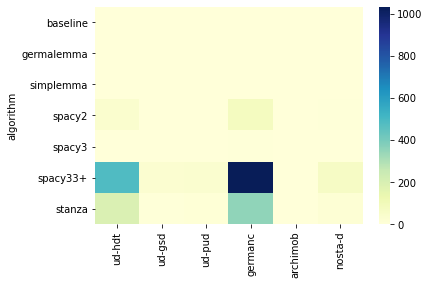

In [42]:
sns.heatmap(time, cmap="YlGnBu")

In [47]:
memory = pd.DataFrame(columns=['algorithm']+corpora)
line = []
algo_index = 0
for d in data:
    if d['dataset'] == 'archimob' or len(line)==4:  # error reading in archimob
        line.append(0)
        continue
    line.append(d['memory_peak'])
    if d['dataset'] == 'nosta-d':  # last corpus reached
        memory.loc[len(memory)] = [algos[algo_index]] + line
        line = []
        algo_index += 1  # next algorithm
memory = memory.set_index('algorithm')
memory = memory.astype(float)
memory

,ud-hdt,ud-gsd,ud-pud,germanc,archimob,nosta-d
algorithm,,,,,,
baseline,72.0,0.0,48.0,4.800000e+01,0.0,0.0
germalemma,29336563.0,445398.0,1072563.0,3.541075e+07,0.0,806812.0
simplemma,172822097.0,600854.0,3297621.0,2.324640e+07,0.0,624402.0
spacy2,352450412.0,13165989.0,17276251.0,6.443319e+08,0.0,27713953.0
spacy3,158755092.0,9207884.0,8302646.0,3.114068e+08,0.0,17347294.0
spacy33+,251155751.0,13974444.0,14264471.0,5.116736e+08,0.0,30928058.0
stanza,497860142.0,24898789.0,32443298.0,1.185841e+09,0.0,62312916.0


<AxesSubplot:ylabel='algorithm'>

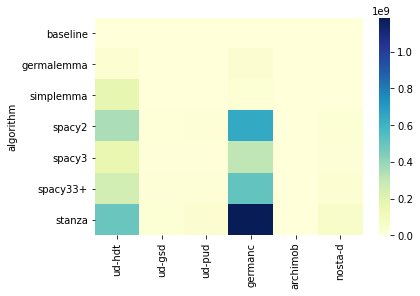

In [48]:
sns.heatmap(memory, cmap="YlGnBu")